# Modelos de Regresión Lineal
## Modelos con datos simulados

* y = a + b * x
* X: 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuido según una N(0, 0.8)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
%matplotlib inline

In [18]:
x = 1.5 + 2.5 * np.random.randn(100)

In [19]:
res = 0 + 0.8 * np.random.randn(100)

In [20]:
y_pred = 5 + 1.9 * x

In [21]:
y_act = 5 + 1.9 * x + res

In [22]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [27]:
data = pd.DataFrame (
    {
        'x':x_list,
        'y_actual':y_act_list,
        'y_prediccion':y_pred_list
        
    }
)

In [28]:
data.head()

,x,y_actual,y_prediccion
0,5.254051,15.293129,14.982697
1,0.676847,6.414377,6.286010
2,1.075031,5.976736,7.042558
3,3.468869,11.256265,11.590851
4,2.400222,8.837007,9.560422


In [49]:
y_mean = [np.mean(y_act) for i in range(len(y_act))]

Text(0.5,1,'Valor Actual vs Predicción')

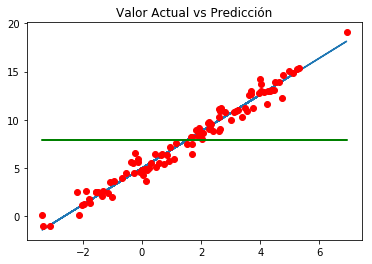

In [50]:
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [51]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [52]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [53]:
SSR

1886.5335855169637

In [54]:
SSD

56.557668843800208

In [55]:
SST

1885.784504501717

In [85]:
R2 = SSR/SST

In [86]:
R2

0.97029513953065627

(array([  2.,   3.,   9.,  12.,  20.,  22.,  12.,  12.,   5.,   3.]),
 array([-1.97415988, -1.59965702, -1.22515416, -0.8506513 , -0.47614844,
        -0.10164557,  0.27285729,  0.64736015,  1.02186301,  1.39636587,
         1.77086874]),
 <a list of 10 Patch objects>)

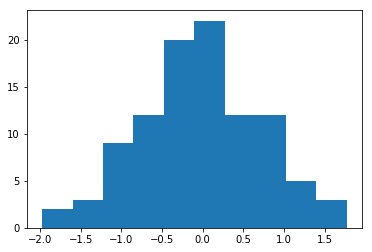

In [59]:
plt.hist(data["y_prediccion"] - data["y_actual"])

### Obtener la recta de regresión

* y = a + b * x
* b = sum((xi - x_m)*(yi - y_m)) / sum((xi - x_m)^2)
* a = y_m - b * x_m

In [64]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4985634735498423, 7.880252152465706)

In [68]:
# La beta es la covarianza
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [70]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [71]:
alpha = y_mean - beta * x_mean 

In [72]:
alpha, beta

(5.0760652688089127, 1.8712499891740666)

In [75]:
"El modelo obtenido es: y = {} + {} * x".format(alpha, beta)

'El modelo obtenido es: Y = 5.076065268808913 +1.8712499891740666 * x'

In [76]:
data["y_model"] = alpha + beta * data["x"]

In [77]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,5.254051,15.293129,14.982697,50.444723,0.096368,54.950748,27.838968,14.103687,14.907708
1,0.676847,6.414377,6.286010,2.541608,0.016478,2.148791,1.204534,0.675217,6.342616
2,1.075031,5.976736,7.042558,0.701731,1.135977,3.623374,0.806202,0.179380,7.087716
3,3.468869,11.256265,11.590851,13.768541,0.111948,11.397461,6.651775,3.882103,11.567186
4,2.400222,8.837007,9.560422,2.822972,0.523329,0.915380,0.862667,0.812989,9.567481


In [79]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [80]:
SSR, SSD, SST

(1829.7675389202429, 56.016965581475276, 1885.784504501717)

In [83]:
R2 = SSR / SST

In [84]:
R2

0.97029513953065627

Text(0.5,1,'Valor Actual vs Predicción')

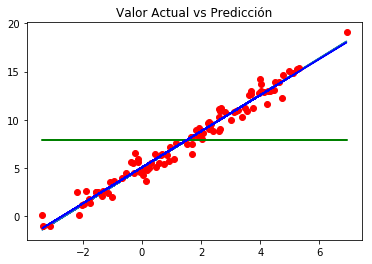

In [89]:
y_mean = [np.mean(y_act) for i in range(len(y_act))]

plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.plot(x,data["y_model"], "b")
plt.title("Valor Actual vs Predicción")